### Exploratory Data Analysis on a data set

In [ ]:
Objective:
Perform a comprehensive exploratory analysis to uncover insights, identify patterns, and understand the dataset's structure 
using statistical summaries, visualizations, and data manipulation techniques.

Dataset Description:
The dataset includes the following variables:

LB: Baseline Fetal Heart Rate (FHR)
AC: Accelerations in the FHR
FM: Fetal Movements
UC: Uterine Contractions
DL: Late Decelerations
DS: Short Decelerations
DP: Prolonged Decelerations
ASTV: Percentage of Time with Abnormal Short Term Variability
MSTV: Mean Value of Short Term Variability
ALTV: Percentage of Time with Abnormal Long Term Variability
MLTV: Mean Value of Long Term Variability


In [ ]:
Tasks:
1.Data Cleaning and Preparation:
->Load the dataset into a DataFrame.
->Handle missing values (imputation or deletion).
->Correct inconsistencies in data types.
->Detect and treat outliers.

2.Statistical Summary:
->Provide statistical summaries for each variable (mean, median, standard deviation, interquartile range).
->Highlight any interesting findings.

3.Data Visualization:
->Histograms or boxplots for numerical variable distributions.
->Bar charts or pie charts for categorical variable frequencies.
->Scatter plots or correlation heatmaps to explore relationships between variables.
->Advanced techniques like pair plots or violin plots for deeper insights.

4.Pattern Recognition and Insights:
->Identify correlations and discuss their implications.
->Look for trends or patterns over time if temporal data is available.

5.Conclusion:
->Summarize key insights and patterns.
->Discuss the potential impact on decision-making or further analyses.
->Deliverables:
->A detailed Jupyter Notebook containing the code, visualizations, and explanations for each step of the analysis.
->A brief report summarizing findings, insights, and recommendations for further analysis or actions based on the data.


In [3]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Load the dataset
df = pd.read_csv(r"D:\EDA1\Cardiotocographic.csv")
print(df)

              LB        AC        FM        UC        DL   DS   DP  ASTV  \
0     120.000000  0.000000  0.000000  0.000000  0.000000  0.0  0.0  73.0   
1     132.000000  0.006380  0.000000  0.006380  0.003190  0.0  0.0  17.0   
2     133.000000  0.003322  0.000000  0.008306  0.003322  0.0  0.0  16.0   
3     134.000000  0.002561  0.000000  0.007742  0.002561  0.0  0.0  16.0   
4     131.948232  0.006515  0.000000  0.008143  0.000000  0.0  0.0  16.0   
...          ...       ...       ...       ...       ...  ...  ...   ...   
2121  140.000000  0.000000  0.961268  0.007426  0.000000  0.0  0.0  79.0   
2122  140.000000  0.000775  0.000000  0.006979  0.000000  0.0  0.0  78.0   
2123  140.000000  0.000980  0.000000  0.006863  0.000000  0.0  0.0  79.0   
2124  140.000000  0.000679  0.000000  0.006110  0.000000  0.0  0.0  78.0   
2125  142.000000  0.001616 -0.000188  0.008078  0.000000  0.0  0.0  74.0   

      MSTV       ALTV  MLTV  Width  Tendency       NSP  
0      0.5  43.000000   2.4   

In [5]:
# Display the first few rows of the dataset
print(df.head())

           LB        AC   FM        UC        DL   DS   DP  ASTV  MSTV  ALTV  \
0  120.000000  0.000000  0.0  0.000000  0.000000  0.0  0.0  73.0   0.5  43.0   
1  132.000000  0.006380  0.0  0.006380  0.003190  0.0  0.0  17.0   2.1   0.0   
2  133.000000  0.003322  0.0  0.008306  0.003322  0.0  0.0  16.0   2.1   0.0   
3  134.000000  0.002561  0.0  0.007742  0.002561  0.0  0.0  16.0   2.4   0.0   
4  131.948232  0.006515  0.0  0.008143  0.000000  0.0  0.0  16.0   2.4   0.0   

   MLTV  Width  Tendency  NSP  
0   2.4   64.0  0.999926  2.0  
1  10.4  130.0  0.000000  1.0  
2  13.4  130.0  0.000000  1.0  
3  23.0  117.0  1.000000  1.0  
4  19.9  117.0  1.000000  1.0  


In [6]:
# Data Cleaning and Preparation
# Handle missing values
df = df.dropna()  # Simple approach, you may choose to impute instead

In [9]:
# Convert data types if necessary
# Here, assuming all data is numerical; otherwise, convert as needed

# Detect and treat outliers (optional, depending on the context)
# Example: Removing outliers that are 3 standard deviations away from the mean
for col in df.select_dtypes(include=[np.number]).columns:
    df = df[(np.abs(df[col] - df[col].mean()) <= (3 *df[col].std()))]

In [10]:
# Statistical Summary
summary = df.describe()
print(summary)

                LB           AC           FM           UC           DL  \
count  1492.000000  1492.000000  1492.000000  1492.000000  1492.000000   
mean    133.700248     0.003319     0.002432     0.004342     0.001348   
std       9.840677     0.003714     0.005922     0.002831     0.002271   
min     106.000000    -0.000185    -0.005106    -0.000132    -0.000124   
25%     126.000000     0.000000     0.000000     0.002112     0.000000   
50%     134.000000     0.001921     0.000000     0.004470     0.000000   
75%     141.000000     0.005872     0.001874     0.006496     0.001869   
max     160.000000     0.014726     0.043053     0.012072     0.009202   

                 DS           DP         ASTV         MSTV         ALTV  \
count  1.492000e+03  1492.000000  1492.000000  1492.000000  1492.000000   
mean   1.891284e-09     0.000002    46.235102     1.154009     8.391054   
std    1.396071e-07     0.000038    15.873029     0.603147    14.068828   
min   -1.700000e-06    -0.000045 

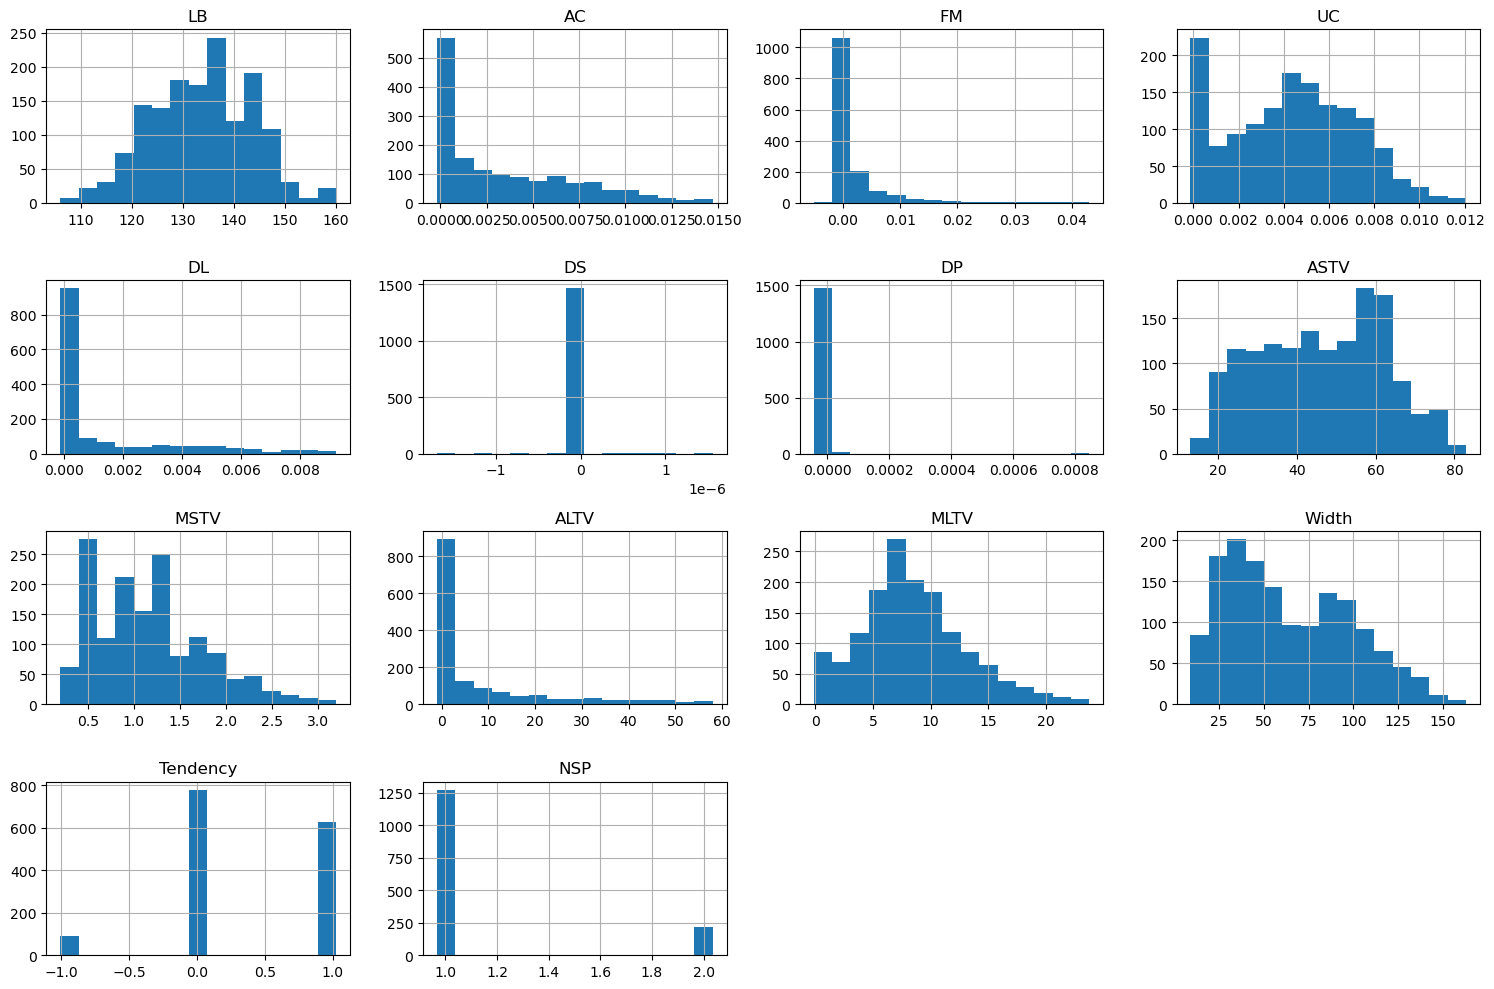

In [11]:
# Data Visualization
import matplotlib.pyplot as plt

# Adjust layout to fit 14 histograms
df.hist(bins=15, figsize=(15, 10), layout=(4, 4))
plt.tight_layout()
plt.show()


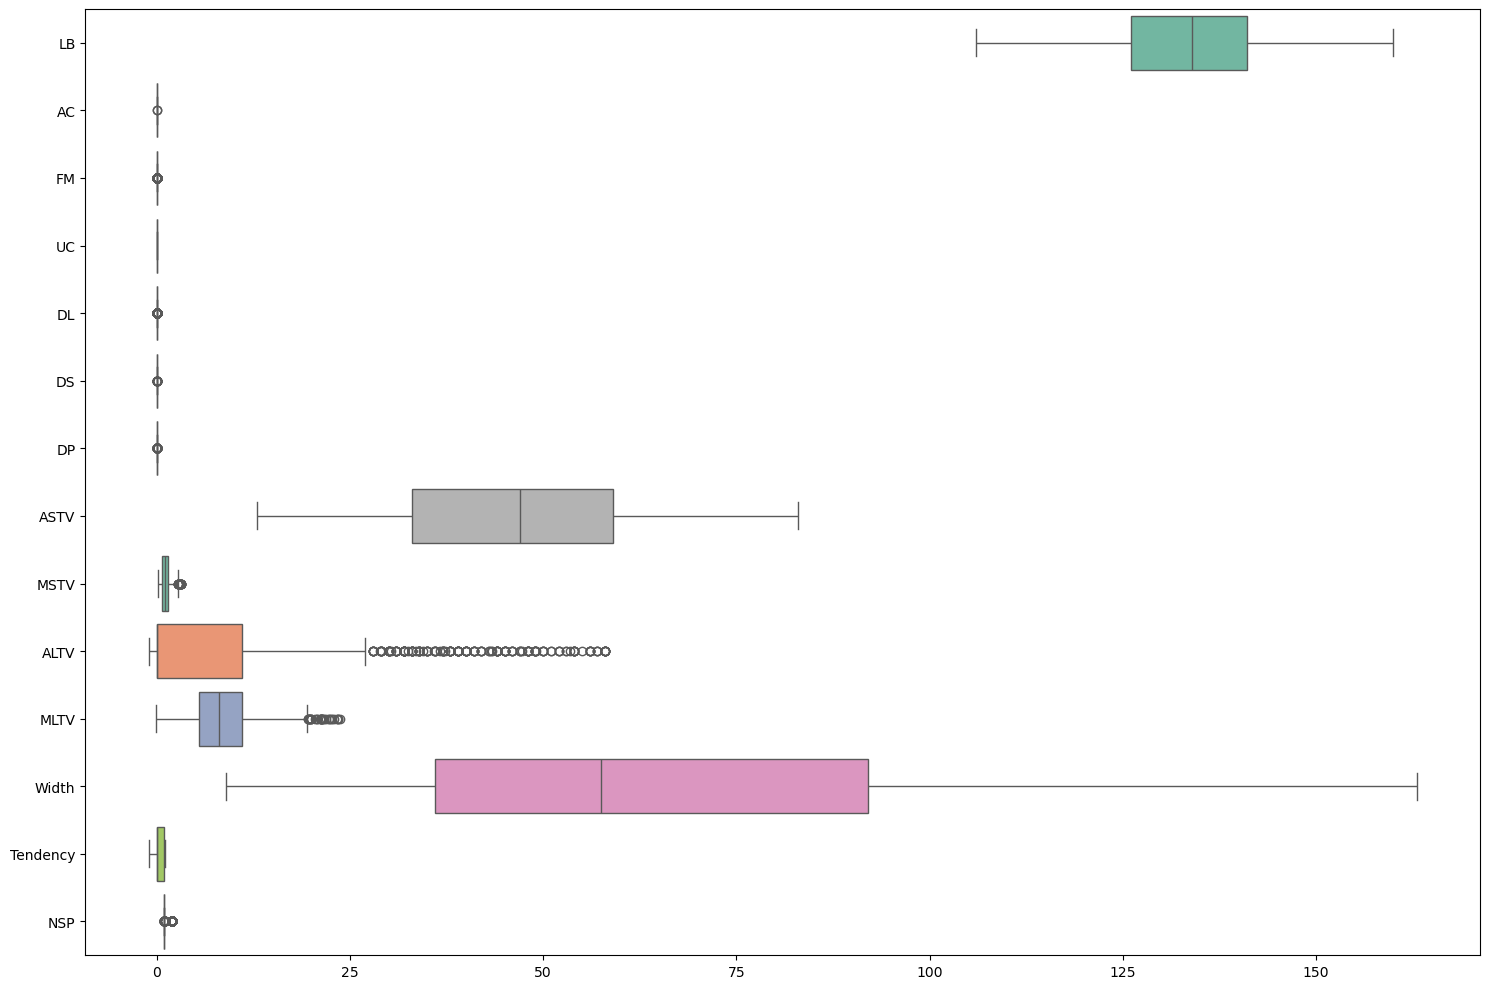

In [14]:
# Boxplots for numerical variables
plt.figure(figsize=(15, 10))
sns.boxplot(data=df, orient="h", palette="Set2")
plt.tight_layout()
plt.show()

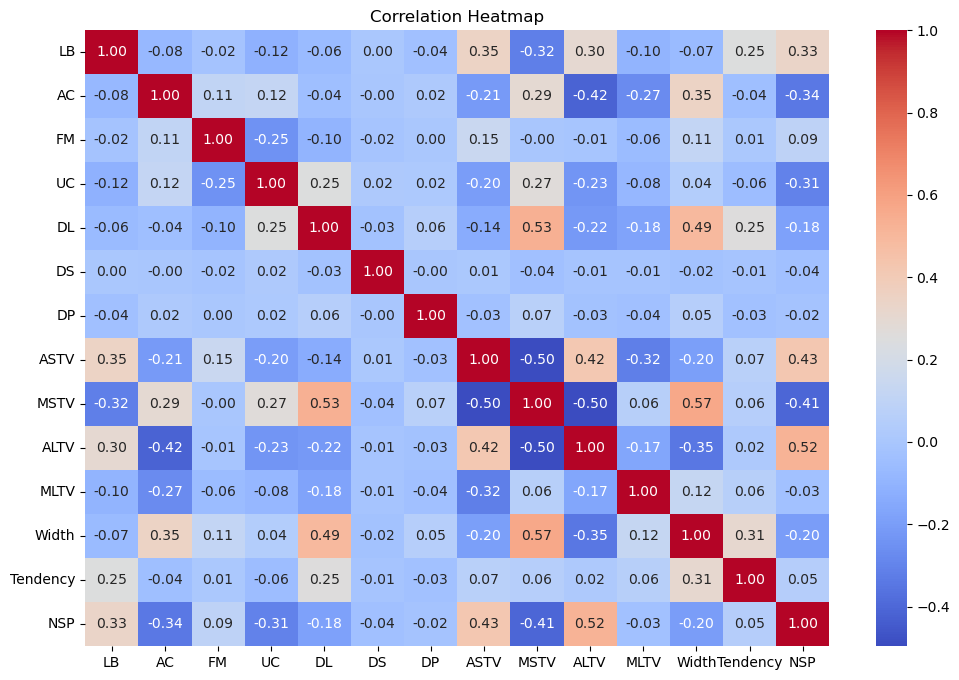

In [15]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\OM\AppData\Roaming\Python\Python311\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\OM\AppData\Roaming\Py

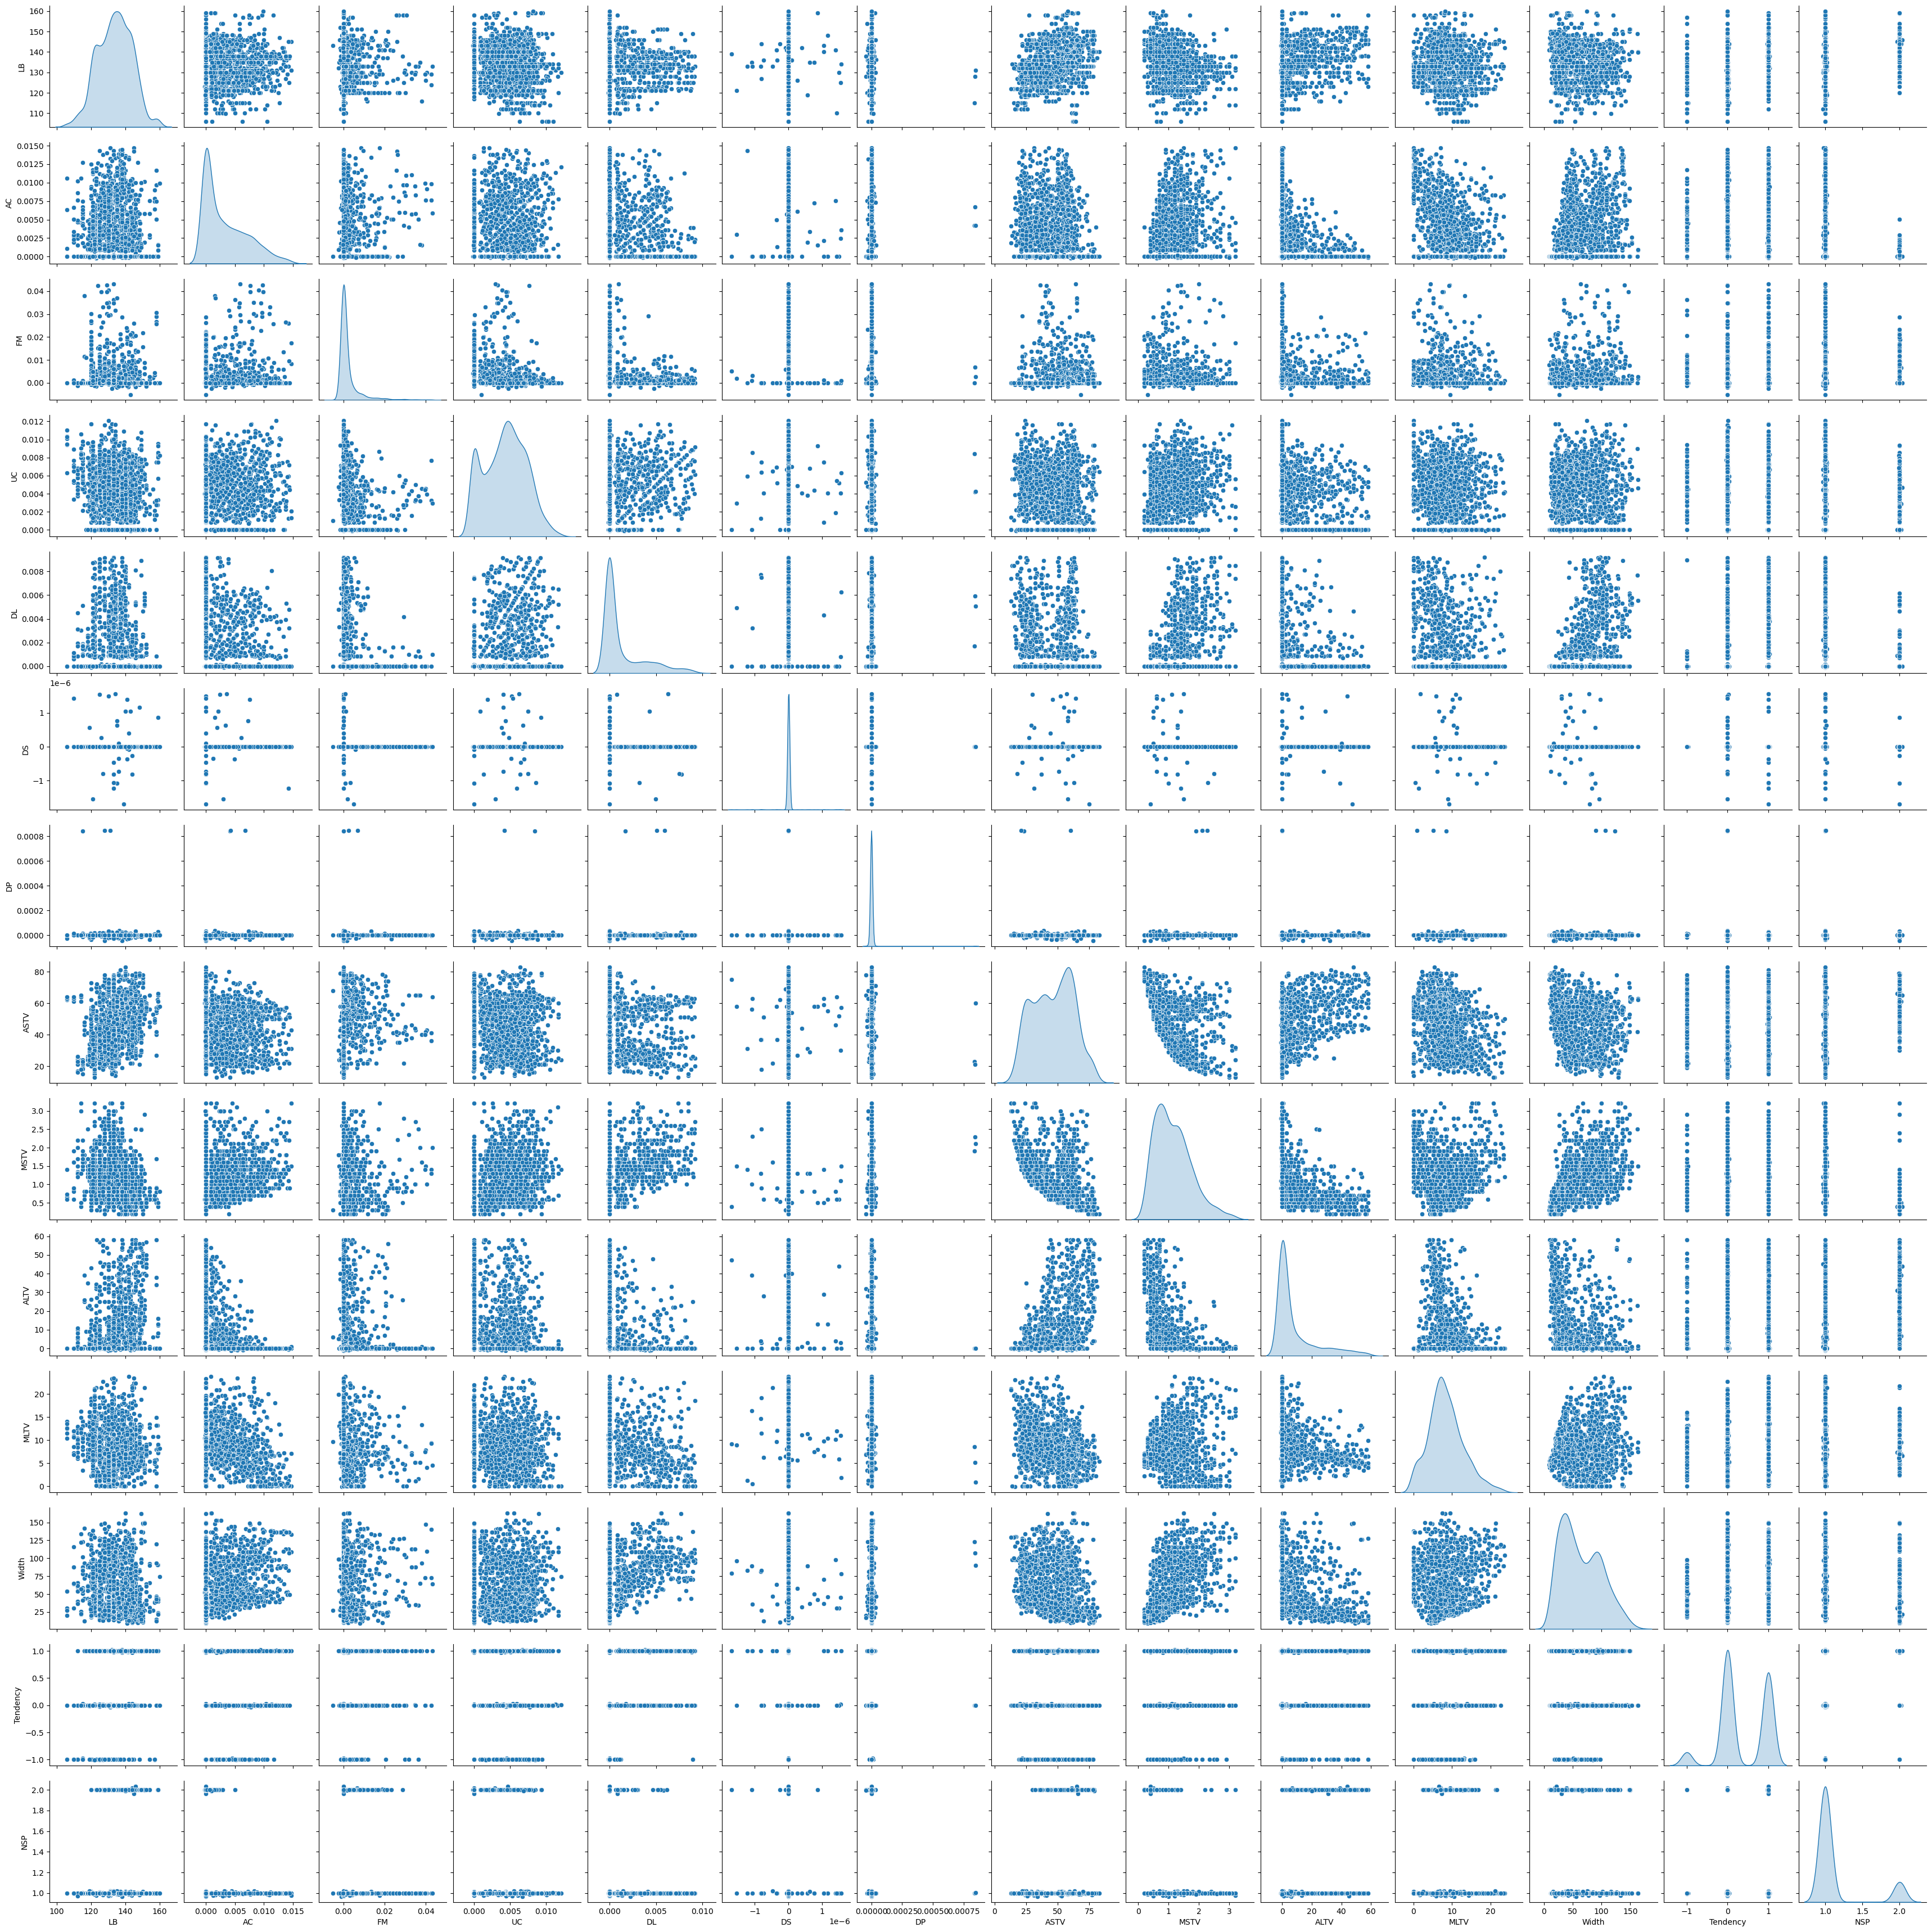

In [16]:
# Pair plot for deeper insights
sns.pairplot(df, diag_kind='kde', palette='husl')
plt.show()

In [14]:
# Pattern Recognition and Insights
# Identify correlations
correlations = df.corr()
print(correlations)

                LB        AC        FM        UC        DL        DS  \
LB        1.000000 -0.078174 -0.022783 -0.116419 -0.064347  0.003720   
AC       -0.078174  1.000000  0.110084  0.122847 -0.041272 -0.000595   
FM       -0.022783  0.110084  1.000000 -0.247878 -0.101578 -0.016933   
UC       -0.116419  0.122847 -0.247878  1.000000  0.247610  0.021085   
DL       -0.064347 -0.041272 -0.101578  0.247610  1.000000 -0.025002   
DS        0.003720 -0.000595 -0.016933  0.021085 -0.025002  1.000000   
DP       -0.038349  0.021320  0.003998  0.017836  0.056908 -0.000312   
ASTV      0.345980 -0.213593  0.145007 -0.201588 -0.138437  0.006671   
MSTV     -0.317893  0.293207 -0.002553  0.266472  0.532867 -0.035135   
ALTV      0.299733 -0.420195 -0.009131 -0.234678 -0.216748 -0.013758   
MLTV     -0.103038 -0.271282 -0.060512 -0.084774 -0.179642 -0.014929   
Width    -0.066924  0.348022  0.112384  0.041606  0.494208 -0.024150   
Tendency  0.249751 -0.040854  0.006397 -0.056284  0.252352 -0.01

In [15]:
# Conclusion
# Summarize insights
insights = """
Key Insights
- Variables such as LB, AC, FM, UC, etc., show different distributions.
- Correlation heatmap reveals relationships between several variables.
- Pair plots give deeper insights into the relationships and distributions.
- Further analysis could focus on specific patterns identified in the data.
"""
print(insights)


Key Insights
- Variables such as LB, AC, FM, UC, etc., show different distributions.
- Correlation heatmap reveals relationships between several variables.
- Pair plots give deeper insights into the relationships and distributions.
- Further analysis could focus on specific patterns identified in the data.



In [16]:
# Save the report and visualizations (optional)
summary.to_csv('statistical_summary.csv')
correlations.to_csv('correlations.csv')